In [48]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
results_post = './data/Milestones - Post Experiment All.csv'
results_pre = './data/Milestones - Pre Experiment.csv'
results_milestones = './data/Milestones - timeStandard-prod-fill-nan.csv'

dataBinary_post = pd.read_csv(results_post)
dataPre = pd.read_csv(results_pre)
dataMilestones = pd.read_csv(results_milestones)


In [49]:
dataBinary_post

,Unnamed: 0,Participant,group,issue,Why did you choose that issue?,Categories of reasons to select the issue,Summary: Why Did you choose,Post: Skills Needed,Skills Correct,Unnamed: 9,...,Post: Helpful Labels,Post: Confidence Level Had Skills,ConfidenceNumeric,Post: Additional Feedback,Post: Education Level,Occupation,Gender,Country of Origin,Curr Country,Age
0,P7,sm4332@nau.edu,Control,4612,It is the only known issue to me that contains...,Matching Skills,Skills Matched,"User Interface (UI),Testing,Input and Output","UI, IO",NaN,...,"search,entry editor,type: bug","Not confident (can manage, but difficult)",2,NaN,Undergraduate degree,Student - Graduate,Woman,India,United States of America,25 to 34
1,P2,hk486@nau.edu,Treatment,5069,That issue looked the most easy issue.,Perceived Ease,Easy,"User Interface (UI),Testing,Input and Output",UI,NaN,...,"API: User Interface,entry editor,type: bug","Not confident (can manage, but difficult)",2,NaN,High school,Student - Undergraduate,Man,South Korea,United States of America,24 or less
2,P13,gk325@nau.edu,Control,4612,I just thought it would be something related t...,Perceived Ease,Skills Matched,None,None,NaN,...,search,Average,3,had fun. Thank you.,Master's degree,Student - Graduate,Man,India,United States of America,25 to 34
3,P1,gummadisk99@gmail.com,Control,4612,"AS I SAID EARLIER, URL SHOULD BE VISIBLE TO TH...",Moral,Had idea of the solution,"User Interface (UI),Testing",UI,NaN,...,"API: User Interface,preferences,type: bug","Not confident (can manage, but difficult)",2,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
4,P6,"nk545@nau,edu",Control,5069,search pattern and thought simmple,Perceived Ease,Easy,"User Interface (UI),Logging,Testing,Input and ...","Logging, UI",NaN,...,"search,type: bug",Average,3,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
5,P8,jk2396@nau.edu,Treatment,5069,This is an issue related to GUI and logic rela...,Matching Skills,Skills Matched,"User Interface (UI),Logging,Testing,Input and ...","Logging, UI",NaN,...,"API: User Interface,type: bug","Not confident (can manage, but difficult)",2,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
6,P9,rm2878@nau.edu,Treatment,5679,Autosave is a useful features which allows the...,Moral,Interested in problem,"Logging,Testing,Network Development,Google Com...",Logging,NaN,...,"API: Test,API: Input and Output","Not confident (can manage, but difficult)",2,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
7,P12,FelipeFelixSantos@gmail.com,Treatment,5485,"Because of the ""good first issue label""",Perceived Ease,Useful information,None,None,NaN,...,good first issue,Confident,4,1 - Not being able to use shortcuts due to the...,Undergraduate degree,Professional Developer,Man,Brazil,Portugal,25 to 34
8,P11,klp468@nau.edu,Control,5069,I found it interesting and have some knowledge...,"Curiosity, Matching Skills",Interested in problem,"Testing,Input and Output",None,NaN,...,search,Average,3,NaN,Undergraduate degree,Student - Graduate,Woman,India,United States of America,24 or less
9,P14,sb3292@nau.edu,Treatment,5194,I found that it was one of the concerns that I...,Matching Skills,Easy,"Testing,Google Common,Input and Output","Google Common, IO",NaN,...,"API: Google Common,API: Logging,type: bug,exte...",Average,3,I had a lot of fun trying to debug the code.,Master's degree,Student - Graduate,Woman,India,United States of America,24 or less


In [50]:
dataBinary_post.drop(columns=["Why did you choose that issue?", "Post: Explain Difficulty", "Post: Explain Accomplishment", "Post: How could we make it easier?", "Post: Additional Feedback"])

,Unnamed: 0,Participant,group,issue,Categories of reasons to select the issue,Summary: Why Did you choose,Post: Skills Needed,Skills Correct,Unnamed: 9,Percentage Skills Correct,...,Summary: How could we make it easier?,Post: Helpful Labels,Post: Confidence Level Had Skills,ConfidenceNumeric,Post: Education Level,Occupation,Gender,Country of Origin,Curr Country,Age
0,P7,sm4332@nau.edu,Control,4612,Matching Skills,Skills Matched,"User Interface (UI),Testing,Input and Output","UI, IO",NaN,0.666667,...,None,"search,entry editor,type: bug","Not confident (can manage, but difficult)",2,Undergraduate degree,Student - Graduate,Woman,India,United States of America,25 to 34
1,P2,hk486@nau.edu,Treatment,5069,Perceived Ease,Easy,"User Interface (UI),Testing,Input and Output",UI,NaN,0.200000,...,Additional documentation and issue info,"API: User Interface,entry editor,type: bug","Not confident (can manage, but difficult)",2,High school,Student - Undergraduate,Man,South Korea,United States of America,24 or less
2,P13,gk325@nau.edu,Control,4612,Perceived Ease,Skills Matched,None,None,NaN,0.000000,...,Additional documentation and issue info,search,Average,3,Master's degree,Student - Graduate,Man,India,United States of America,25 to 34
3,P1,gummadisk99@gmail.com,Control,4612,Moral,Had idea of the solution,"User Interface (UI),Testing",UI,NaN,0.333333,...,None,"API: User Interface,preferences,type: bug","Not confident (can manage, but difficult)",2,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
4,P6,"nk545@nau,edu",Control,5069,Perceived Ease,Easy,"User Interface (UI),Logging,Testing,Input and ...","Logging, UI",NaN,0.400000,...,Improved comments and code readability,"search,type: bug",Average,3,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
5,P8,jk2396@nau.edu,Treatment,5069,Matching Skills,Skills Matched,"User Interface (UI),Logging,Testing,Input and ...","Logging, UI",NaN,0.400000,...,Improved comments and code readability,"API: User Interface,type: bug","Not confident (can manage, but difficult)",2,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
6,P9,rm2878@nau.edu,Treatment,5679,Moral,Interested in problem,"Logging,Testing,Network Development,Google Com...",Logging,NaN,0.333333,...,Improved comments and code readability,"API: Test,API: Input and Output","Not confident (can manage, but difficult)",2,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
7,P12,FelipeFelixSantos@gmail.com,Treatment,5485,Perceived Ease,Useful information,None,None,NaN,0.000000,...,Additional documentation and issue info,good first issue,Confident,4,Undergraduate degree,Professional Developer,Man,Brazil,Portugal,25 to 34
8,P11,klp468@nau.edu,Control,5069,"Curiosity, Matching Skills",Interested in problem,"Testing,Input and Output",None,NaN,0.000000,...,Improve experiment system/environment,search,Average,3,Undergraduate degree,Student - Graduate,Woman,India,United States of America,24 or less
9,P14,sb3292@nau.edu,Treatment,5194,Matching Skills,Easy,"Testing,Google Common,Input and Output","Google Common, IO",NaN,0.666667,...,Improved comments and code readability,"API: Google Common,API: Logging,type: bug,exte...",Average,3,Master's degree,Student - Graduate,Woman,India,United States of America,24 or less


In [ ]:
#Relevel the factors for Difficulty
#TODO Wilson-Cox test for numeric values and difference between groups. 
#TODO Test for the factors/string based scales. 
#dataBinary_post = dataBinary_post.assign(Difficulty = [1 if a == "Extremely easy" 2 elif a == "Somewhat Easy" else  for a in dataBinary_post['Post: Difficulty']])
#dataBinary_post.head()
#dataBinary_post["Post: Difficulty"] = pd.Categorical(dataBinary_post["Post: Difficulty"])
#1 is low confidence, 5 is high confidence
#dataBinary_post["Post: Difficulty"] = dataBinary_post["Post: Difficulty"].cat.codes
postMeans = dataBinary_post.groupby(['group']).mean()
postMeans

dataBinary_post.groupby(['group']).count()

,issue,Unnamed: 9,Percentage Skills Correct,DifficultyNumeric,ConfidenceNumeric
group,,,,,
Control,5134.800,5259.750000,0.22000,3.733333,2.733333
Treatment,5296.125,5252.444444,0.26725,3.500000,2.812500


In [52]:
confidenceCounts = dataBinary_post.groupby(['group', 'Post: Confidence Level Had Skills'])['Participant'].count()
confidenceCounts

group      Post: Confidence Level Had Skills        
Control    Average                                      8
           Confident                                    2
           Not confident (can manage, but difficult)    4
           Uncomfortable                                1
Treatment  Average                                      3
           Confident                                    5
           Not confident (can manage, but difficult)    8
Name: Participant, dtype: int64

#Relevel the factors for Difficulty
#TODO Wilson-Cox test for numeric values and difference between groups. 
#TODO Test for the factors/string based scales. 
#dataBinary_post = dataBinary_post.assign(Difficulty = [1 if a == "Extremely easy" 2 elif a == "Somewhat Easy" else  for a in dataBinary_post['Post: Difficulty']])
#dataBinary_post.head()
#dataBinary_post["Post: Difficulty"] = pd.Categorical(dataBinary_post["Post: Difficulty"])
#1 is low confidence, 5 is high confidence
#dataBinary_post["Post: Difficulty"] = dataBinary_post["Post: Difficulty"].cat.codes
postMeans = dataBinary_post.groupby(['group', ']).mean()
postMeans

In [53]:
control = dataBinary_post[dataBinary_post["group"]=='Control']
treatment = dataBinary_post[dataBinary_post["group"]=='Treatment']
len(control)
len(treatment)
#wilcoxon(control, treatment)


16

<AxesSubplot:xlabel='group'>

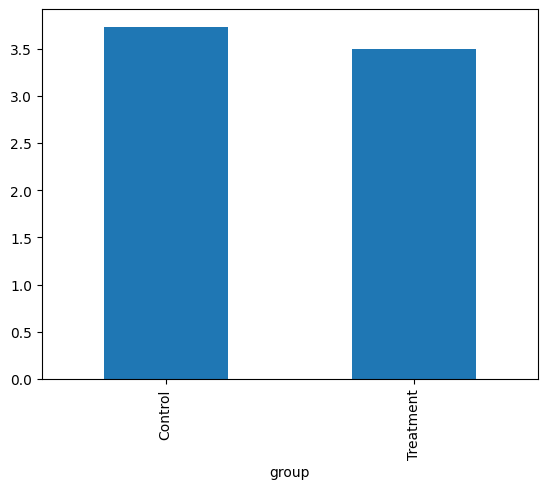

In [54]:
postMeans["DifficultyNumeric"].plot(kind='bar')

In [55]:
dataPre.head()

,Participant,group,issue_number,Pre:Why did they select,Pre: Summary: Why did you select,Pre: Confidence Level,Pre: Explain Confidence Level,Pre: Summary: Explain Confidence Level,Pre: Skills Needed,Pre: Skills Correct,Pre: Percentage Skills Correct,Pre: Helpful Labels,Post: Skills Needed
0,gummadisk99@gmail.com,Control,4612,url should be visible to the end users and sho...,Had idea of the solution.,"Not confident (can manage, but difficult)",2,Rating out of ten,"User Interface (UI),Testing",UI,0.50,"preferences,entry editor,type: bug","User Interface (UI),Testing"
1,hk486@nau.edu,Treatment,5069,This issue looked the easy to contribute.,Easy,"Not confident (can manage, but difficult)",I am not sure if I can change the issue. But I...,Idea of the solution and location of problem.,"User Interface (UI),Testing,Network Developmen...","UI, Network",0.40,API: User Interface,"User Interface (UI),Testing,Input and Output"
2,ap3535@nau.edu,Control,5485,The issue was descriptive compared to other is...,Issue more descriptive than others.,Confident,I have prior experience of working with API.,Prior Experience/Skills Match.,"Google Common,Input and Output",Util,0.25,None of the above,Google Common
3,kv582@nau.edu,Control,5485,I chose this issue since its an issue widely f...,Interested in problem.,Average,I have initially started my research on deprec...,Prior Experience/Skills Match.,"Testing,Google Common",Util,0.25,"API: Test,API: Google Common,search",Google Common
4,vg588@nau.edu,Treatment,5485,This feel like newer version of the package ha...,Had idea of the solution,Average,I have handled the package dependencies upgrad...,Prior Experience/Skills Match.,"Logging,Testing,Input and Output",None,0.00,"API: Input and Output,fetcher,good first issue","Logging,Testing"


In [56]:
preMeans = dataPre.groupby(['group']).mean()
preMeans

,issue_number,Pre: Percentage Skills Correct
group,,
Control,5116.714286,0.219048
Treatment,5357.400000,0.226667


In [57]:
dataPre.head()

,Participant,group,issue_number,Pre:Why did they select,Pre: Summary: Why did you select,Pre: Confidence Level,Pre: Explain Confidence Level,Pre: Summary: Explain Confidence Level,Pre: Skills Needed,Pre: Skills Correct,Pre: Percentage Skills Correct,Pre: Helpful Labels,Post: Skills Needed
0,gummadisk99@gmail.com,Control,4612,url should be visible to the end users and sho...,Had idea of the solution.,"Not confident (can manage, but difficult)",2,Rating out of ten,"User Interface (UI),Testing",UI,0.50,"preferences,entry editor,type: bug","User Interface (UI),Testing"
1,hk486@nau.edu,Treatment,5069,This issue looked the easy to contribute.,Easy,"Not confident (can manage, but difficult)",I am not sure if I can change the issue. But I...,Idea of the solution and location of problem.,"User Interface (UI),Testing,Network Developmen...","UI, Network",0.40,API: User Interface,"User Interface (UI),Testing,Input and Output"
2,ap3535@nau.edu,Control,5485,The issue was descriptive compared to other is...,Issue more descriptive than others.,Confident,I have prior experience of working with API.,Prior Experience/Skills Match.,"Google Common,Input and Output",Util,0.25,None of the above,Google Common
3,kv582@nau.edu,Control,5485,I chose this issue since its an issue widely f...,Interested in problem.,Average,I have initially started my research on deprec...,Prior Experience/Skills Match.,"Testing,Google Common",Util,0.25,"API: Test,API: Google Common,search",Google Common
4,vg588@nau.edu,Treatment,5485,This feel like newer version of the package ha...,Had idea of the solution,Average,I have handled the package dependencies upgrad...,Prior Experience/Skills Match.,"Logging,Testing,Input and Output",None,0.00,"API: Input and Output,fetcher,good first issue","Logging,Testing"


In [58]:
dataBinary_post.head()

,Unnamed: 0,Participant,group,issue,Why did you choose that issue?,Categories of reasons to select the issue,Summary: Why Did you choose,Post: Skills Needed,Skills Correct,Unnamed: 9,...,Post: Helpful Labels,Post: Confidence Level Had Skills,ConfidenceNumeric,Post: Additional Feedback,Post: Education Level,Occupation,Gender,Country of Origin,Curr Country,Age
0,P7,sm4332@nau.edu,Control,4612,It is the only known issue to me that contains...,Matching Skills,Skills Matched,"User Interface (UI),Testing,Input and Output","UI, IO",NaN,...,"search,entry editor,type: bug","Not confident (can manage, but difficult)",2,NaN,Undergraduate degree,Student - Graduate,Woman,India,United States of America,25 to 34
1,P2,hk486@nau.edu,Treatment,5069,That issue looked the most easy issue.,Perceived Ease,Easy,"User Interface (UI),Testing,Input and Output",UI,NaN,...,"API: User Interface,entry editor,type: bug","Not confident (can manage, but difficult)",2,NaN,High school,Student - Undergraduate,Man,South Korea,United States of America,24 or less
2,P13,gk325@nau.edu,Control,4612,I just thought it would be something related t...,Perceived Ease,Skills Matched,None,None,NaN,...,search,Average,3,had fun. Thank you.,Master's degree,Student - Graduate,Man,India,United States of America,25 to 34
3,P1,gummadisk99@gmail.com,Control,4612,"AS I SAID EARLIER, URL SHOULD BE VISIBLE TO TH...",Moral,Had idea of the solution,"User Interface (UI),Testing",UI,NaN,...,"API: User Interface,preferences,type: bug","Not confident (can manage, but difficult)",2,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
4,P6,"nk545@nau,edu",Control,5069,search pattern and thought simmple,Perceived Ease,Easy,"User Interface (UI),Logging,Testing,Input and ...","Logging, UI",NaN,...,"search,type: bug",Average,3,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less


In [59]:
summaryPreChoosing = dataPre.groupby(['Pre: Summary: Why did you select'])['Participant'].count()
summaryPreChoosing


Pre: Summary: Why did you select
Easy                                                      1
Easy. Had idea of the solution.                           1
Had idea of the solution                                  1
Had idea of the solution.                                 1
Idea of solution                                          1
Interested in problem.                                    2
Interested in problem.                                    1
Issue more descriptive than others.                       1
None.                                                     1
Skills matched. Issue descriptive.                        1
Skills matched. Prior experience with similar problem.    1
Name: Participant, dtype: int64

In [60]:
summaryConfidenceLevel = dataPre.groupby(['Pre: Summary: Explain Confidence Level', 'group'])['Participant'].count()
summaryConfidenceLevel


Pre: Summary: Explain Confidence Level          group    
Idea of the solution and location of problem.   Control      1
                                                Treatment    3
Prior Experience/Skills Match.                  Control      2
                                                Treatment    2
Rating out of ten                               Control      4
Name: Participant, dtype: int64

In [61]:
summaryWhyChoose = dataBinary_post.groupby(['Summary: Why Did you choose', 'group'])['Participant'].count()
summaryWhyChoose

Summary: Why Did you choose  group    
Chaos                        Treatment    1
Easy                         Control      5
                             Treatment    5
Had idea of the solution     Control      1
Interested in problem        Control      4
                             Treatment    3
Skills Matched               Control      4
                             Treatment    4
Useful information           Treatment    2
Name: Participant, dtype: int64

In [62]:
feedbackSummaryDifficulty = dataBinary_post.groupby(['Summary: Explain Difficulty', 'group'])['Participant'].count()
feedbackSummaryDifficulty

Summary: Explain Difficulty                                                             group    
Environment issues                                                                      Control      1
Issue had relevant information                                                          Treatment    1
Lack of familiarity with JabRef                                                         Control      4
                                                                                        Treatment    3
Lack of helpful information                                                             Treatment    1
Lack of helpful information; Lack of familiarity with JabRef; Environment issues;       Control      1
Lack of skill match                                                                     Treatment    1
Rating out of ten                                                                       Control      4
Simple change                                                                 

In [63]:
summaryAccomplishment = dataBinary_post.groupby(["Summary: Explain Accomplishment", "group"])['Participant'].count()
summaryAccomplishment

Summary: Explain Accomplishment                          group    
Couldn't find location                                   Control      1
Couldn't find location                                   Treatment    1
Couldn't fully test                                      Control      1
                                                         Treatment    1
Couldn't implement code                                  Control      9
                                                         Treatment    6
Couldn't understand the problem and high level solution  Treatment    1
Found code location                                      Treatment    1
Implemented code                                         Control      2
Partially implemented; Couldn't fully test               Treatment    1
Unable to verify solution                                Control      1
                                                         Treatment    3
Name: Participant, dtype: int64

In [64]:
summaryMakeEasier = dataBinary_post.groupby(["Summary: How could we make it easier?", "group"])['Participant'].count()
summaryMakeEasier

Summary: How could we make it easier?    group    
Additional documentation and issue info  Control      4
                                         Treatment    5
Give examples of correct code            Control      1
Improve experiment system/environment    Control      3
                                         Treatment    2
Improve logging in code                  Treatment    1
Improved comments and code readability   Control      2
                                         Treatment    5
None                                     Control      4
                                         Treatment    1
Name: Participant, dtype: int64

In [65]:
dataMilestones.head()

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,alternative answer,Number of Milestones,Gift card requested,Gift card received,group,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib
0,ItaloSantos,2:35 PM,17,17,18,18,19,21,21,24,...,NaN,3,y,y,Control,5679,4.0,0.0,NaN,NaN
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44,45,45,46,47,48,...,NaN,7,y,y,Treatment,5485,NaN,NaN,7.0,0.0
2,gk325@nau.edu,3:09:00 PM,1,6,56,56,58,60,60,60,...,NaN,0,y,y,Treatment,4612,3.0,0.0,NaN,NaN
3,sb3292@nau.edu,4:21:00 PM,3,19,23,23,23,27,27,46,...,y,1,y,y,Treatment,5194,NaN,NaN,9.0,9.0
4,gummadisk99@gmail.com,1:20 PM,4,14,38,38,38,41,41,50,...,NaN,0,y,y,Control,4612,1.0,1.0,NaN,NaN


In [66]:
from scipy.stats import mannwhitneyu
milestonesinfo = dataMilestones[['Number of Milestones', 'group']]
M_control = milestonesinfo[dataMilestones["group"] == 'Control']
print(M_control)
control_milestones = M_control['Number of Milestones'].astype('int32')
#print(control_milestones.dtype)

M_treatment = milestonesinfo[dataMilestones["group"] == 'Treatment']
treatment_milestones = M_treatment['Number of Milestones'].astype('int32')
print(treatment_milestones)

stat, p = mannwhitneyu(control_milestones, treatment_milestones)
print('Statistics=', stat, 'p=', p)
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

    Number of Milestones    group
0                      3  Control
4                      0  Control
6                      0  Control
9                      1  Control
10                     0  Control
13                     0  Control
14                     1  Control
1     7
2     0
3     1
5     1
7     1
8     6
11    1
12    1
Name: Number of Milestones, dtype: int32
Statistics= 15.0 p= 0.11970096046232809
Same distribution (fail to reject H0)


In [67]:
numMilestonesAvg = dataMilestones.groupby(['group'])["Number of Milestones"].mean()
numMilestonesAvg

group
Control      0.714286
Treatment    2.250000
Name: Number of Milestones, dtype: float64

In [68]:

numMilestonesMedian = dataMilestones.groupby(['group'])["Number of Milestones"].median()
numMilestonesMedian
#numMilestonesAvg.plot(kind='bar')

group
Control      0.0
Treatment    1.0
Name: Number of Milestones, dtype: float64